<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_7_Solucionario_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solucionario Ejercicio 2

Lectura: “Acemoglu, D., Johnson, S., Robinson, J. A. (2002). Reversal of Fortune: Geography and Institutions in the Making of the Modern World Income Distribution. The Quarterly Journal of Economics, 117(4), 1231-1294.”. 

In [ ]:
# Instalar paquetes
install.packages("foreign")
install.packages("ggplot2")
install.packages("memisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Llamar librerias
library(foreign)
library(dplyr)
library(ggplot2)
library(memisc)

In [ ]:
# Importar bases de datos
data <- read.dta("/content/RevFort.dta",
          convert.factor = FALSE, 
          convert.underscore = FALSE) 
data

,shortnam,africa,catho80,muslim80,lat_abst,f_french,f_spain,f_pothco,temp1,temp2,⋯,america,nafrica,ex2col,asia,notmcp80,neoeur,sjb1500,baserf,coal,island
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,,NA,NA,NA,NA,NA,NA,NA,27,29,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
2,,NA,NA,NA,NA,NA,NA,NA,7,10,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
3,,NA,NA,NA,NA,NA,NA,NA,7,10,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
4,,NA,NA,NA,NA,NA,NA,NA,26,29,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
5,,NA,NA,NA,NA,NA,NA,NA,7,10,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
6,,NA,NA,NA,NA,NA,NA,NA,7,10,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
7,,NA,NA,NA,NA,NA,NA,NA,7,10,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
8,,NA,NA,NA,NA,NA,NA,NA,27,33,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0
9,,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,NA,NA,NA,NA,NA,NA,0,0


In [ ]:
clean_data <- data %>%
  filter(baserf==1)

In [ ]:
names(clean_data)

[1] "shortnam" "africa"   "catho80"  "muslim80" "lat_abst" "f_french"
 [7] "f_spain"  "f_pothco" "temp1"    "temp2"    "temp3"    "temp4"   
[13] "temp5"    "humid1"   "humid2"   "humid3"   "humid4"   "steplow" 
[19] "deslow"   "stepmid"  "desmid"   "f_dutch"  "f_belg"   "f_italy" 
[25] "f_germ"   "logpgp95" "landlock" "goldm"    "iron"     "silv"    
[31] "zinc"     "oilres"   "america"  "nafrica"  "ex2col"   "asia"    
[37] "notmcp80" "neoeur"   "sjb1500"  "baserf"   "coal"     "island"

## Pregunta 3

Replicar la Figura I del artículo. Qué intentan transmitir los autores con esta figura?

`geom_smooth()` using formula 'y ~ x'



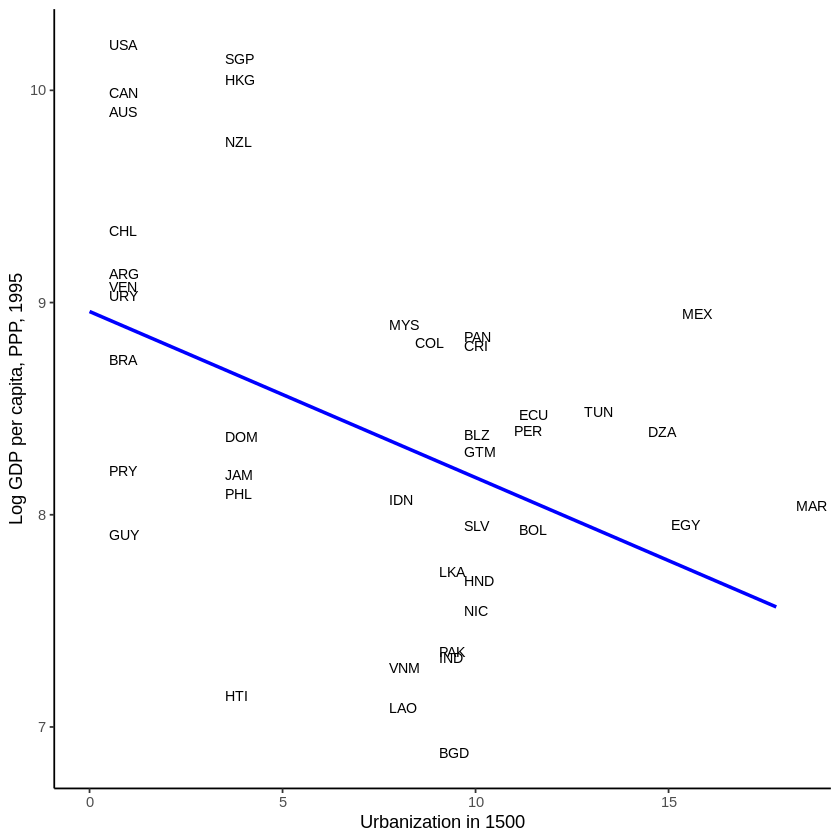

In [ ]:
ggplot(clean_data, 
       aes(x = sjb1500, y = logpgp95)) + 
       geom_text(hjust = 0, nudge_x = 0.5, size = 3, aes(label = shortnam)) +
       geom_smooth(method = "lm", se = F, color = "blue") +
       labs (x = "Urbanization in 1500", y = "Log GDP per capita, PPP, 1995") +
       theme_classic()

## Pregunta 6

In [ ]:
ols_1 <- lm(logpgp95 ~ sjb1500, data=clean_data)
se_1  <- sqrt(diag(vcov(ols_1))) 

In [ ]:
ols_2 <- lm(logpgp95 ~ sjb1500, data=subset(clean_data, nafrica!=1))
se_2 <-sqrt(diag(vcov(ols_2)))

In [ ]:
ols_3 <- lm(logpgp95 ~ sjb1500, data=subset(clean_data, america!=1))
se_3 <-sqrt(diag(vcov(ols_3)))

In [ ]:
ols_4 <- lm(logpgp95 ~ sjb1500, data=subset(clean_data, america==1))
se_4 <-sqrt(diag(vcov(ols_4))) 

In [ ]:
ols_5 <- lm(logpgp95 ~ sjb1500 + asia + africa + america, data=clean_data)
se_5 <-sqrt(diag(vcov(ols_5)))

In [ ]:
clean_data2 <- clean_data %>% 
  mutate(neoeur=replace(neoeur, shortnam=="ARG", 0))

In [ ]:
ols_6 <- lm(logpgp95 ~ sjb1500, data=subset(clean_data2, neoeur!=1))
se_6 <-sqrt(diag(vcov(ols_6))) 

In [ ]:
ols_7 <- lm(logpgp95 ~ sjb1500 + lat_abst, data=subset(clean_data2))
se_7 <-sqrt(diag(vcov(ols_7))) 

In [ ]:
ols_8 <- lm(logpgp95 ~ sjb1500 + 
              humid1 + humid2 + humid3 + humid4 + 
              temp1 + temp2 + temp3 + temp4 + temp5 + 
              steplow + deslow + stepmid + desmid, 
            data=clean_data)
se_8 <-sqrt(diag(vcov(ols_8))) 

In [ ]:
table_1 <- mtable("Model 1" = ols_1,
                  "Model 2" = ols_2,
                  "Model 3" = ols_3,
                  "Model 4" = ols_4,
                  "Model 5" = ols_5,
                  "Model 6" = ols_6,
                  "Model 7" = ols_7,
                  "Model 8" = ols_8,
            summary.stats = c("N", "R-squared", "F", "p"),
            coef.style = "default", 
            digits=3)

(table_1 <- relabel(table_1,
          "(Intercept)" = "Constant",
          sjb1500 = "Urbanization in 1500",
          asia = "Asia dummy",
          africa = "Africa dummy",
          america = "American dummy",
          lat_abst = "Latitude"
          )
)

Calls:
Model 1: lm(formula = logpgp95 ~ sjb1500, data = clean_data)
Model 2: lm(formula = logpgp95 ~ sjb1500, data = subset(clean_data, nafrica != 
    1))
Model 3: lm(formula = logpgp95 ~ sjb1500, data = subset(clean_data, america != 
    1))
Model 4: lm(formula = logpgp95 ~ sjb1500, data = subset(clean_data, america == 
    1))
Model 5: lm(formula = logpgp95 ~ sjb1500 + asia + africa + america, data = clean_data)
Model 6: lm(formula = logpgp95 ~ sjb1500, data = subset(clean_data2, neoeur != 
    1))
Model 7: lm(formula = logpgp95 ~ sjb1500 + lat_abst, data = subset(clean_data2))
Model 8: lm(formula = logpgp95 ~ sjb1500 + humid1 + humid2 + humid3 + 
    humid4 + temp1 + temp2 + temp3 + temp4 + temp5 + steplow + 
    deslow + stepmid + desmid, data = clean_data)

================================================================================================================
                         Model 1    Model 2    Model 3    Model 4    Model 5    Model 6    Model 7    Model 8   
----------------------------------------------------------------------------------------------------------------
  Constant               8.958***   9.037***   9.221***   8.839***   9.951***   8.619***   8.614***  12.048***  
                        (0.206)    (0.223)    (0.461)    (0.210)    (0.542)    (0.216)    (0.300)    (2.507)    
  Urbanization in 1500  -0.078**   -0.101**   -0.115*    -0.053     -0.082*    -0.046     -0.072**   -0.088**   
                        (0.026)    (0.032)    (0.051)    (0.029)    (0.030)    (0.026)    (0.025)    (0.030)    
  Asia dummy                                                        -1.326*                                     
                                                                    (0.607)                                     
  Africa dummy                                                      -0.525                                      
                                                                    (0.773)                                     
  American dummy                                                    -0.955                                      
                                                                    (0.574)                                     
  Latitude                                                                                 1.420                
                                                                                          (0.917)               
  humid1                                                                                              0.047     
                                                                                                     (0.037)    
  humid2                                                                                             -0.055     
                                                                                                     (0.054)    
  humid3                                                                                             -0.015     
                                                                                                     (0.040)    
  humid4                                                                                              0.011     
                                                                                                     (0.047)    
  temp1                                                                                               0.271     
                                                                                                     (0.186)    
  temp2                                                                                              -0.071     
                                                                                                     (0.060)    
  temp3                                                                                              -0.121     
                                                              

In [ ]:
# Hacer una tabla en html
stargazer(ols_1,  ols_2, ols_3, ols_4, ols_5, ols_6, ols_7, ols_8,
          type="html", out="modelo_lineal.html",
          covariate.labels = c("Urbanization in 1500", "Asia dummy", 
                               "Africa dummy", "American dummy",
                               "Latitude"),
          dep.var.labels = c("Log GDP per capita (PPP) in 1995"), 
          title = "Urbanization in 1500 and GDP per capita in 1995 for Former European Colonies",
          notes = c("Source: Own Elaboration"))


## Pregunta 7

In [ ]:
# Creo tres vectores con el fin de utilizarlos en el test F
temperature <- subset(clean_data, select=c(temp1, temp2, temp3, temp4, temp5))
humidity    <- subset(clean_data, select=c(humid1, humid2, humid3, humid4))
soil        <- subset(clean_data, select=c(steplow, stepmid, deslow, desmid))

# Creo la matriz de variables explicativas X
X <- cbind(1, sjb1500, temperature, humidity, soil)

# Creo el vector de la variable dependiente Y
Y <- clean_data$logpgp95

In [ ]:
# Creo una formula con la regresion de la columna ocho
modelo8 <- formula(logpgp95 ~ sjb1500 + 
                     temp1 + temp2 + temp3 + temp4 + temp5 + 
                     humid1 + humid2 + humid3 + humid4 + 
                     steplow + stepmid + deslow + desmid)

In [ ]:
# Estimacion
ols8 <- lm(modelo8, data=clean_data)
summary(ols8)


Call:
lm(formula = modelo8, data = clean_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2051 -0.4010 -0.1134  0.2462  1.5174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.04832    2.50734   4.805 5.62e-05 ***
sjb1500     -0.08784    0.02977  -2.950  0.00664 ** 
temp1        0.27105    0.18551   1.461  0.15596    
temp2       -0.07070    0.06046  -1.169  0.25288    
temp3       -0.12073    0.09169  -1.317  0.19943    
temp4       -0.09939    0.07746  -1.283  0.21078    
temp5       -0.04973    0.04575  -1.087  0.28709    
humid1       0.04732    0.03698   1.280  0.21198    
humid2      -0.05510    0.05411  -1.018  0.31793    
humid3      -0.01542    0.03969  -0.389  0.70080    
humid4       0.01113    0.04666   0.239  0.81336    
steplow      0.13782    0.41358   0.333  0.74164    
stepmid      0.15323    0.68960   0.222  0.82589    
deslow       0.25810    0.40015   0.645  0.52458    
desmid      -0.07975    0.89564  -0.089  0.92973

In [ ]:
#Creo las matrices R y r for temperature
R1 <- matrix(0,ncol(temperature),ncol(X))
for (i in 1:ncol(temperature)) {
          R1[i,i+2]<-1
}
R1

r1<-matrix(0,nrow(R1),1)
r1

0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


0
0
0
0
0


In [ ]:
# Creo las matrices R y r for humidity
R2 <- matrix(0,ncol(humidity),ncol(X))
for (i in 1:ncol(humidity)) {
  R2[i,i+7] <- 1
}
R2

r2<-matrix(0,nrow(R2),1)
r2

0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


0
0
0
0


In [ ]:
# Creo las matrices R y r for soil
R3 <- matrix(0,ncol(soil),ncol(X))
for (i in 1:ncol(soil)) {
  R3[i,i+11]<-1
}
R3

r3<-matrix(0,nrow(R3),1)
r3

0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


0
0
0
0


In [ ]:
# Esta funcion me da el F-estadistico y el p-value:
my_Ftest <- function(R,r, model){
  
  V_hat <- as.matrix(vcov(ols8))
  b_hat <- as.matrix(coef(ols8))
  
  Fstat <- (t((R%*%b_hat - r))%*%solve(R%*%V_hat%*%t(R))%*%(R%*%b_hat - r))/ nrow(R)
  pv <- pf(Fstat,nrow(r),ols8$df.residual, lower.tail = FALSE) 
  cat(paste("\nEstadístico F es: ",round(Fstat, 3),
            "\np-value es", round(pv, 3), "\n\n"))
}

In [ ]:
my_Ftest(R1,r1, ols8)
my_Ftest(R2,r2, ols8)
my_Ftest(R3,r3, ols8)


Estadístico F es:  1.482 
p-value es 0.23 


Estadístico F es:  1.046 
p-value es 0.4 


Estadístico F es:  0.158 
p-value es 0.96 

